In [15]:
import re
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools
import pickle
from settings import *

In [2]:
# n_lines = 0
# with open(corpus, 'rb') as file:
#     for line in file:
#         n_lines += 1
# print(f'Numero de líneas: {n_lines}')

n_lines = 213_517_354
f"Lineas usadas sobre el total:{LINES_USED/n_lines:.3%}"

'Lineas usadas sobre el total:1.171%'

In [3]:
def printLines(stop=10, decode=False):
    with open(corpus, 'rb') as datafile:
        for i,line in enumerate(datafile):
            
            if decode:
                print(i,line.decode("utf-8"))
            else:
                print(i,line)
            if i==stop: break

printLines(10,True)

0 NETKonet trae para ti...

1 "Twenty"

2 [NEW Presenta]

3 [Una producción de A M Tree Pictures]

4 [Sidus HQ]

5 [Productor ejecutivo:

6 Kim Woo Taek]

7 Somos los típicos amigos de la secundaria que juraron que su amistad duraría para siempre.

8 Aunque las circunstancias del inicio de nuestra amistad no fueron especiales en cierto modo fueron especiales para nosotros.

9 Ejem... ejem.

10 Ejem...



In [4]:
#funcion para buscar ejemplos a la hora de tratar la puntuacion
def search_line(search_string,stop=10):
    n=0
    prev_line,line_found = "",""
    prnt = False
    
    with open(corpus, 'rb') as datafile:
        for i,line in enumerate(datafile):
            if prnt:
                print("-------------")
                print(prev_line.decode("utf-8"),line_found.decode("utf-8"),
                      line.decode("utf-8"), sep="\n")
                prnt = False
                n+=1
                if n==stop:
                    break
            if search_string in line: 
                line_found = line
                prnt = True
            else:
                prev_line = line
                
search_line(b":bi")

-------------
{F:

Times New Roman}{Y:bi}"Quien hace una bestia de sí mismo se libera del dolor de ser un hombre." DR.

JOHNSON

-------------
JOHNSON

{Y:bi}Estábamos cerca de Barstow, en el borde del desierto... {Y:bi}cuando las drogas comenzaron a tomar el control.

{y:bi}Recuerdo que dije algo como:

-------------
JOHNSON

{y:bi}Recuerdo que dije algo como:

Me siento un poco mareado.

-------------
Tal vez tú debieras manejar.

{Y:bi}De repente hubo un terrible estruendo alrededor nuestro... {Y:bi}y el cielo se llenó con lo que parecían murciélagos gigantes... {y:bi}revoloteando y chillando alrededor del auto.

{Y:bi}Y una voz gritó: ¡Santo Dios!

-------------
Tal vez tú debieras manejar.

{Y:bi}Y una voz gritó: ¡Santo Dios!

¡¿Qué son esos malditos animales?

-------------
Te toca manejar.

{Y:bi}No valía la pena mencionar a esos murciélagos, pensé.

{Y:bi}El pobre bastardo ya los vería pronto.

-------------
Te toca manejar.

{Y:bi}El pobre bastardo ya los vería pronto.

¡Maldi

In [5]:
#Procesado de la puntuación
def processLine(s):
    s = s.strip().lower().decode()
    s = re.sub(r"\.000",r" mil", s)
    s = re.sub(r"^-",       r"<GUION_INIC>", s)
    s = re.sub(r"-{2}",     r"<GUION_DOBL>", s)
    s = re.sub(r"\.{3}",    r"<TRIP_DOT>", s)
    s = re.sub(r"(\w)-(\w)",r"\1<GUION_INTER>\2", s)
    s = re.sub(r"([\):!?])", r" \1", s)      #separa puntuacion con espacio antes
    s = re.sub(r"([\(¡¿])", r"\1 ", s)       #separa puntuacion con espacio despues
    s = re.sub(r"([\"-,¿\.}])", r" \1 ", s)  #espacio antes y despues
    
    #separa los tokens
    s = re.sub(r"<", r" <", s)
    s = re.sub(r">", r"> ", s)
    
    s = re.sub(r"\s<GUION_INTER>\s",r"-", s)
    return s

print("#Test  0:", processLine("-t. -t".encode()))
print("#Test  1:", processLine("t. .t ¿t?".encode()))
print("#Test  2:", processLine("t... ¿¿¿t???".encode()))
print("#Test  3:", processLine("...t ...".encode()))
print("#Test  4:", processLine("???...!!!".encode()))
print("#Test  5:", processLine('"¿Cómo?"'.encode()))
print("#Test  6:", processLine('(--8:)'.encode()))
print("#Test  7:", processLine('electro-quimico'.encode()))
print("#Test  8:", processLine('que--'.encode()))
print("#Test  9:", processLine('-ivanov'.encode()))
print("#Test 10:", processLine('10.000, 5:45'.encode()))
print("#Test 11:", processLine('8:00 8:00h'.encode()))
print("#Test 12:", processLine('.¿ -¿'.encode()))
print("#Test 13:", processLine(':bi}vamos'.encode()))

#Test  0:  <GUION_INIC> t .  -t
#Test  1: t .   . t  ¿  t ?
#Test  2: t <TRIP_DOT>   ¿   ¿   ¿  t ? ? ?
#Test  3:  <TRIP_DOT> t  <TRIP_DOT> 
#Test  4:  ? ? ? <TRIP_DOT>  ! ! !
#Test  5:  "  ¿  cómo ? " 
#Test  6:  (   <GUION_DOBL> 8 :  ) 
#Test  7: electro-quimico
#Test  8: que <GUION_DOBL> 
#Test  9:  <GUION_INIC> ivanov
#Test 10: 10 mil ,  5 :45
#Test 11: 8 :00 8 :00h
#Test 12:  .  ¿   - ¿  
#Test 13:  :bi } vamos


In [6]:
def loadLines(file, total_lines=10, max_lenght=MAX_LENGTH):
    with open(file, 'rb') as datafile:
        n=0
        for i,line in enumerate(datafile):
            if max(line.find(b"["),line.find(b"]")) == -1: #filtra los comentarios
                s = processLine(line)
                if len(s.split(' ')) < max_lenght: #filtra frases largas
                    n+=1
                    yield i,s
            if n==total_lines: break
                
for i,l in loadLines(corpus,100): print(i,l)

0 netkonet trae para ti <TRIP_DOT> 
1  " twenty " 
7 somos los típicos amigos de la secundaria que juraron que su amistad duraría para siempre . 
9 ejem <TRIP_DOT>  ejem . 
10 ejem <TRIP_DOT> 
12  <GUION_INIC>   ¿  le acariciaste el pecho a fo min ?
13  <GUION_INIC>  no . 
14 no se lo acaricié ,  me quede allí parado tocándolo . 
15  <GUION_INIC>  debes estar demente . 
16  <GUION_INIC>   ¿  eso es una pregunta ?
17  ¿  crees que fue una pregunta ,  idiota ?
18 ey ,  que ya no somos niños . 
19  ¿  en qué estaban pensando para pelear así por una chica ?
20 deben resolverlo de forma razonable . 
21  <GUION_INIC>  háganlo con piedra ,  papel o tijeras . 
22  <GUION_INIC>  es una buena idea .  ¡ hagámoslo !
23 ok ,  solo haremos una ronda ,  como hombres . 
24 ¡ piedra ,  papel o tijeras !
25 un hombre de verdad usa una piedra . 
26 ¡ piedra ,  papel o tijeras !
27 hagámoslo de nuevo . 
28 piedra ,  papel o tijeras . 
29 piedra ,  papel o tijeras . 
30 piedra ,  papel o tijeras . 
31  <GU

In [7]:
# Default word tokens
class Voc:
    def __init__(self, name):
        self.name = name
        self.trimmed = False
        self.word2index = {}
        self.word2count = {}
        self.index2word = {PAD_token: "PAD", SOS_token: "SOS", EOS_token: "EOS"}
        self.num_words = 3  # Count SOS, EOS, PAD

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.num_words
            self.word2count[word] = 1
            self.index2word[self.num_words] = word
            self.num_words += 1
        else:
            self.word2count[word] += 1

    # Remove words below a certain count threshold
    def trim(self, min_count):
        if self.trimmed:
            return
        self.trimmed = True

        keep_words = []

        for k, v in self.word2count.items():
            if v >= min_count:
                keep_words.append(k)

        print(f"keep_words {len(keep_words)} / { len(self.word2index)} = "
              f"{len(keep_words) / len(self.word2index):.4f}")

        # Reinitialize dictionaries
        self.word2index = {}
        self.word2count = {}
        self.index2word = {PAD_token: "PAD", SOS_token: "SOS", EOS_token: "EOS"}
        self.num_words = 3 # Count default tokens

        for word in keep_words:
            self.addWord(word)

Número de palabras: 125785


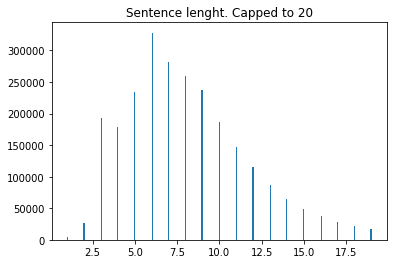

In [8]:
#TODO: multithread
voc = Voc(corpus_name)

hist = []  
for i,s in loadLines(corpus,LINES_USED):
    s_l = len(s.split(' '))
    hist.append(s_l)
    voc.addSentence(s)
    
print(f'Número de palabras: {voc.num_words}')

arr = np.array(hist)
plt.hist(arr, bins='auto')  # arguments are passed to np.histogram
plt.title(f"Sentence lenght. Capped to {MAX_LENGTH}")
plt.show()

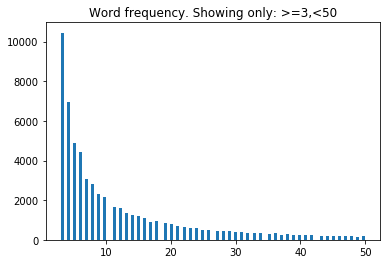

In [16]:
hist=[]
for i,n in enumerate(voc.word2count):
    c = voc.word2count[n]
    if c>=3:
        hist.append(c)
        
arr = np.array(hist)
plt.hist(arr, bins=100,range=(3,50))  # arguments are passed to np.histogram
plt.title(f"Word frequency. Showing only: >=3,<50")
plt.show()

In [10]:
from collections import Counter
c = Counter(voc.word2count)
c.most_common()

[('', 4148066),
 ('.', 1672227),
 (',', 620706),
 ('?', 467598),
 ('¿', 433674),
 ('<GUION_INIC>', 399255),
 ('no', 369732),
 ('que', 349430),
 ('de', 344245),
 ('a', 261042),
 ('!', 248102),
 ('la', 237657),
 ('¡', 211380),
 ('el', 203391),
 ('es', 196013),
 ('y', 165135),
 ('lo', 164368),
 ('en', 161656),
 ('un', 157752),
 ('qué', 136874),
 ('<TRIP_DOT>', 130826),
 ('me', 124366),
 ('por', 119846),
 ('una', 100167),
 ('te', 94988),
 ('se', 88885),
 ('los', 79010),
 ('con', 76681),
 ('está', 71297),
 ('para', 69240),
 ('sí', 65025),
 ('si', 64266),
 ('mi', 64174),
 ('"', 62640),
 ('pero', 62492),
 ('yo', 58992),
 ('eso', 56428),
 ('bien', 54645),
 ('las', 52671),
 ('su', 51309),
 ('le', 47183),
 ('aquí', 46637),
 ('al', 44651),
 ('más', 41923),
 ('tu', 40665),
 ('como', 40266),
 ('del', 40231),
 ('ya', 38336),
 ('todo', 34949),
 ('esto', 34212),
 ('ha', 32411),
 ('muy', 31842),
 ('vamos', 30962),
 ('hay', 29903),
 ('ahora', 29834),
 ('nada', 29085),
 ('algo', 28482),
 ('esta', 28474),

In [11]:
#Check de la puntuacion
punt_dict = {}
for word in c:
    for punt in ",.¿?¡!\":()-{}":
        if punt in word:
            if len(word)>1 and c[word]>3:
                punt_dict[word] = c[word]
c2 = Counter(punt_dict)
c2.most_common()

[('{y', 1291),
 (':bi', 1291),
 (':00', 1082),
 (':30', 524),
 (':15', 132),
 ('brogan-moore', 98),
 ('jean-luc', 95),
 ('sg-1', 91),
 (':10', 90),
 ('rau-ru', 88),
 ('mm-hmm', 86),
 ('-¡', 84),
 (':45', 80),
 ('yo-yo', 67),
 (':25', 64),
 ('g-14', 62),
 ('coca-cola', 59),
 ('e-mail', 59),
 ('wada-san', 56),
 ('ujiie-san', 52),
 ('uh-huh', 51),
 (':22', 51),
 (':26', 49),
 (':55', 49),
 ('pah-wraiths', 48),
 ('jin-a', 44),
 ('bate-huevos', 42),
 (':50', 42),
 ('hana-ogi', 40),
 (':18', 40),
 ('que-', 39),
 (':05', 38),
 (':40', 36),
 ('x-71', 36),
 ('jean-bat', 36),
 ('shen-san', 36),
 ('anne-claire', 35),
 (':58', 35),
 ('slug-o-cola', 33),
 ('in-n-out', 33),
 ('20-40', 32),
 ('b-4', 32),
 ('si-chang', 32),
 ('1-5', 31),
 (':43', 31),
 ('q-qué', 31),
 ('loh-mann', 30),
 ('hombre-lobo', 29),
 ('sg-3', 29),
 ('ex-mujer', 29),
 ('y-', 28),
 ('lancet-percy', 28),
 ('malk-shur', 27),
 ('32-58-78', 26),
 ('ex-esposa', 26),
 ('expedientes-x', 26),
 ('n-no', 26),
 (':32', 25),
 ('yo-', 25),
 

In [17]:
voc.trim(MIN_COUNT)

keep_words 36642 / 125782 = 0.2913


In [18]:
# Filter out sentences with trimmed words
def contain_trimmed(sentence):
    for word in sentence.split(' '):
        if word not in voc.word2index:
            return True

In [19]:
total = 0
deleted = 0
for i,s in loadLines(corpus,LINES_USED):
    total += 1
    if contain_trimmed(s): deleted +=1
        
print(f"Trimmed from {total} pairs to {total-deleted}, {(total-deleted) / total:.4f} of total")

Trimmed from 2500000 pairs to 2281851, 0.9127 of total


In [ ]:
#aumentando min_count de 3 a 5 el vacabulario pasa de 72510(57%) a 36642(29%), sin embargo las frases aceptadas 
#solo baja un 6%, de 97.33% a 91.27%, o lo que es más impactante, con un tercio del vocabulario total podemos 
#recrear más del 90% del dataset 

In [20]:
#1 cargar todas diccionario con line index y sentence
#2 elminiar las mas largas de 50
#3 añadir las palabras al vocabulario
#4 eliminar las sentence con palabras que no salen
#5 pasar los pares con line index contiguos

In [21]:
def indexesFromSentence(sentence, voc):
    return [voc.word2index[word] for word in sentence.split(' ')] + [EOS_token]

def gen_pairs(how_many, voc):
    first_inpt = True
    n=0
    for out_idx,out_snt in loadLines(corpus,LINES_USED):
        if first_inpt:
            inp_idx, inp_snt = out_idx,out_snt
            first_inpt = False
            continue

        if inp_idx+1 == out_idx: #frases contiguas
            if not contain_trimmed(inp_snt) and not contain_trimmed(out_snt):#every word is in Voc
                n+=1
                yield [indexesFromSentence(inp_snt, voc),indexesFromSentence(out_snt, voc)]
        if n==how_many:break
        inp_idx, inp_snt = out_idx,out_snt
        
# for pair in gen_pairs():
#     print(pair)

In [22]:
pairs = list(gen_pairs(LINES_USED,voc))

In [23]:
"""
se obtienen menos pares que lineas usadas, con lineas usadas se crea el diccionario, con ese diccionario elegimos 
las palabras con las que quedarnos, se descartan las lineas con palabras borradas y de ahi solo cogemos los pares
de lineas contiguos
"""
len(pairs)

2049498

In [24]:
#Guardar pairs y voc
with open('data/pairs.pkl', 'wb') as file:
    pickle.dump(pairs, file)

with open('data/voc.pkl', 'wb') as file:
    voc.__module__ = "Voc"
    pickle.dump(voc, file)

In [ ]:
# # Example for validation
# small_batch_size = 6
# pairs_list = [random.choice(pairs) for _ in range(small_batch_size)]
# batches = batch2TrainData(pairs_list)
# input_variable, lengths, target_variable, mask, max_target_len = batches

# print("input_variable:\n", input_variable)
# print("lengths:", lengths)
# print("target_variable:\n", target_variable)
# print("mask:\n", mask)
# print("max_target_len:", max_target_len)